In [560]:
import pandas as pd
import matplotlib.pyplot as plt

In [469]:
df = pd.read_csv(r'E:\Learning\DataSet\Sales_Revenue_Dataset.csv')

In [470]:
df

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount
0,ORD1216,Lisa Palmer,Smartphone,Clothing,NaN,598.70,2025-06-18,East,Alice,20.0,NaN
1,ORD1008,Tony Andrews,Headphones,Clothing,0.0,705.28,2025-04-18,West,Bob,NaN,0.000000
2,ORD1222,Jaime Martinez,Keyboard,Clothing,4.0,386.35,2024-11-19,North,David,15.0,1313.590000
3,ORD1636,Caleb Jackson,Keyboard,Furniture,3.0,293.85,2024-08-03,West,Bob,0.0,881.550000
4,ORD1203,Lisa Miller,Bag,Electronics,2.0,895.08,2024-05-30,North,Charlie,10.0,1611.144000
...,...,...,...,...,...,...,...,...,...,...,...
858,ORD1646,Justin Johnson,Chair,Furniture,5.0,171.10,2025-01-12,East,Alice,0.0,855.500000
859,ORD1237,Jonathan Mendez,Shoes,Clothing,2.0,742.48,2024-04-19,North,Bob,20.0,1187.968000
860,ORD1359,Martin Ross,Smartphone,Furniture,2.0,348.11,2025-07-27,West,Charlie,15.0,591.787000
861,ORD1301,Terry Schneider,T-shirt,Clothing,2.0,480.25,2024-02-20,East,Alice,NaN,960.500000


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       863 non-null    object 
 1   CustomerName  863 non-null    object 
 2   Product       863 non-null    object 
 3   Category      863 non-null    object 
 4   Quantity      771 non-null    float64
 5   PricePerUnit  832 non-null    float64
 6   OrderDate     863 non-null    object 
 7   Region        863 non-null    object 
 8   SalesRep      718 non-null    object 
 9   Discount      716 non-null    float64
 10  TotalAmount   743 non-null    float64
dtypes: float64(4), object(7)
memory usage: 74.3+ KB


In [472]:
df.describe()

,Quantity,PricePerUnit,Discount,TotalAmount
count,771.000000,832.000000,716.000000,743.000000
mean,2.482490,522.702632,9.762570,1180.467089
std,1.460525,284.982649,7.116379,1013.715081
min,0.000000,10.200000,0.000000,0.000000
25%,2.000000,274.505000,5.000000,333.412500
50%,2.000000,533.050000,10.000000,944.119500
75%,3.000000,761.272500,15.000000,1786.033000
max,5.000000,997.660000,20.000000,4974.950000


In [473]:
df.columns

Index(['OrderID', 'CustomerName', 'Product', 'Category', 'Quantity',
       'PricePerUnit', 'OrderDate', 'Region', 'SalesRep', 'Discount',
       'TotalAmount'],
      dtype='object')

In [474]:
df['Category'].unique()

array(['Clothing', 'Furniture', 'Electronics', 'Furnitur', 'Clothin',
       'Clothinx', 'Furniturs', 'Furniturx', 'Clothins', 'Electronic',
       'Electronicx'], dtype=object)

In [475]:
actualCategory = ['Clothing','Furniture','Electronics']
check = df[~df['Category'].isin(actualCategory)]    

In [476]:
check['Category'].unique()

array(['Furnitur', 'Clothin', 'Clothinx', 'Furniturs', 'Furniturx',
       'Clothins', 'Electronic', 'Electronicx'], dtype=object)

In [477]:
correctCategory = {
    'Furnitur': 'Furniture',
    'Furniturs': 'Furniture',
    'Furniturx': 'Furniture',
    'Clothin': 'Clothing',
    'Clothinx': 'Clothing',
    'Clothins': 'Clothing',
    'Electronic': 'Electronics',
    'Electronicx': 'Electronics'
}
df['Category'] = df['Category'].replace(correctCategory)

In [478]:
df['Category'].unique()

array(['Clothing', 'Furniture', 'Electronics'], dtype=object)

In [479]:
df.columns

Index(['OrderID', 'CustomerName', 'Product', 'Category', 'Quantity',
       'PricePerUnit', 'OrderDate', 'Region', 'SalesRep', 'Discount',
       'TotalAmount'],
      dtype='object')

In [480]:
len(df[df['Quantity'] <= 0])

97

In [481]:
medianQuantity = df['Quantity'].median()

In [482]:
print('Median Quantity: ', medianQuantity)

Median Quantity:  2.0


In [483]:
df.loc[df['Quantity'] <= 0, 'Quantity'] = medianQuantity

In [484]:
len(df[df['Quantity'] <= 0])

0

In [485]:
df.head(10)

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount
0,ORD1216,Lisa Palmer,Smartphone,Clothing,NaN,598.70,2025-06-18,East,Alice,20.0,NaN
1,ORD1008,Tony Andrews,Headphones,Clothing,2.0,705.28,2025-04-18,West,Bob,NaN,0.000000
2,ORD1222,Jaime Martinez,Keyboard,Clothing,4.0,386.35,2024-11-19,North,David,15.0,1313.590000
3,ORD1636,Caleb Jackson,Keyboard,Furniture,3.0,293.85,2024-08-03,West,Bob,0.0,881.550000
4,ORD1203,Lisa Miller,Bag,Electronics,2.0,895.08,2024-05-30,North,Charlie,10.0,1611.144000
5,ORD1608,Kayla Gonzalez,Monitor,Electronics,5.0,480.43,2025-09-09,West,Charlie,10.0,2161.935000
6,ORD1336,Angela Rose,Chair,Electronics,1.0,629.59,2026-01-11,West,Eva,10.0,754.505962
7,ORD1281,Heather Adams,Chair,Furniture,1.0,676.17,2025-07-01,South,Bob,5.0,642.361500
8,ORD1379,Angel Bradford,T-shirt,Clothing,3.0,10.20,2025-09-28,North,NaN,5.0,29.070000
9,ORD1728,Brittany Conley,Laptop,Electronics,3.0,928.76,2025-04-03,West,Eva,NaN,2786.280000


In [486]:
df[df['Quantity'].isna()]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount
0,ORD1216,Lisa Palmer,Smartphone,Clothing,NaN,598.70,2025-06-18,East,Alice,20.0,NaN
38,ORD1051,Christopher Johnson,Tablet,Clothing,NaN,774.49,2025-07-13,West,David,5.0,NaN
40,ORD1677,Ryan Davis,Chair,Furniture,NaN,800.33,2025-03-27,West,NaN,10.0,NaN
43,ORD1619,Melinda York,Mouse,Furniture,NaN,693.53,2025-10-16,West,Charlie,20.0,NaN
60,ORD1186,Christina Juarez,Monitor,Furniture,NaN,649.25,2025-10-13,North,Charlie,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
795,ORD1844,Blake Hughes,Keyboard,Clothing,NaN,16.20,2025-04-15,South,David,NaN,NaN
812,ORD1110,Ann Rodriguez,Mouse,Furniture,NaN,460.47,2025-01-15,North,Alice,NaN,NaN
840,ORD1435,Robin Hale,Bag,Electronics,NaN,NaN,2025-04-18,South,David,20.0,NaN
842,ORD1212,Maureen Solis,Shoes,Electronics,NaN,569.79,2024-09-11,North,Charlie,15.0,NaN


In [487]:
print('Is NaN values in Quantity: ',len(df[df['Quantity'].isna()]))

Is NaN values in Quantity:  92


In [488]:
df['Quantity'].describe()

count    771.000000
mean       2.734112
std        1.150095
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Quantity, dtype: float64

In [489]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

In [490]:
df['Quantity'].isna().sum()

np.int64(0)

In [491]:
df.describe()

,Quantity,PricePerUnit,Discount,TotalAmount
count,863.000000,832.000000,716.000000,743.000000
mean,2.655852,522.702632,9.762570,1180.467089
std,1.110375,284.982649,7.116379,1013.715081
min,1.000000,10.200000,0.000000,0.000000
25%,2.000000,274.505000,5.000000,333.412500
50%,2.000000,533.050000,10.000000,944.119500
75%,3.000000,761.272500,15.000000,1786.033000
max,5.000000,997.660000,20.000000,4974.950000


In [492]:
df['PricePerUnit'].describe()

count    832.000000
mean     522.702632
std      284.982649
min       10.200000
25%      274.505000
50%      533.050000
75%      761.272500
max      997.660000
Name: PricePerUnit, dtype: float64

In [493]:
df[df['PricePerUnit']<=0]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount


In [494]:
df.loc[df['PricePerUnit'].isna(),['PricePerUnit','Product']]

,PricePerUnit,Product
14,NaN,Shoes
26,NaN,Smartphone
29,NaN,Watch
37,NaN,Smartphone
56,NaN,Monitor
95,NaN,Desk
116,NaN,Chair
131,NaN,Bag
168,NaN,Keyboard
236,NaN,Tablet


In [495]:
df['PricePerUnit'].isna().sum()

np.int64(31)

In [496]:
df.loc[(df['Product']=='Tablet') & (~df['PricePerUnit'].isna()),['Product','PricePerUnit','Category']]

,Product,PricePerUnit,Category
31,Tablet,959.24,Electronics
38,Tablet,774.49,Clothing
44,Tablet,617.41,Clothing
51,Tablet,548.70,Furniture
76,Tablet,265.54,Electronics
105,Tablet,540.55,Clothing
125,Tablet,390.79,Furniture
134,Tablet,402.60,Furniture
146,Tablet,122.97,Clothing
148,Tablet,896.03,Clothing


In [497]:
df['Product'].unique()

array(['Smartphone', 'Headphones', 'Keyboard', 'Bag', 'Monitor', 'Chair',
       'T-shirt', 'Laptop', 'Shoes', 'Mouse', 'Desk', 'Watch', 'Jacket',
       'Tablet', 'Lamp', 'MouseX', 'Watchs', 'Lamps', 'Smartphones',
       'Desks', 'DeskX', 'SmartphoneX', 'TabletX', 'Jacket1', 'WatchX',
       'T-shirtX', 'Lamp1', 'Smartphone1'], dtype=object)

In [498]:
df['Product'].value_counts()

Product
Desk           72
Chair          69
Monitor        66
Headphones     61
Smartphone     57
Keyboard       57
Tablet         57
Shoes          56
Bag            55
T-shirt        54
Jacket         53
Lamp           50
Laptop         48
Mouse          46
Watch          43
T-shirtX        4
Watchs          2
Lamps           2
MouseX          2
Smartphones     1
Desks           1
DeskX           1
TabletX         1
SmartphoneX     1
Jacket1         1
WatchX          1
Lamp1           1
Smartphone1     1
Name: count, dtype: int64

In [499]:
df[df['Product']=='Keyboard']

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount
2,ORD1222,Jaime Martinez,Keyboard,Clothing,4.0,386.35,2024-11-19,North,David,15.0,1313.590000
3,ORD1636,Caleb Jackson,Keyboard,Furniture,3.0,293.85,2024-08-03,West,Bob,0.0,881.550000
17,ORD1488,Benjamin Hopkins PhD,Keyboard,Furniture,5.0,93.95,2025-06-10,East,NaN,20.0,375.800000
80,ORD1812,Elizabeth Allen,Keyboard,Electronics,3.0,196.62,2024-09-06,South,Alice,10.0,530.874000
109,ORD1441,Olivia Velasquez,Keyboard,Furniture,3.0,210.94,2026-01-01,East,NaN,20.0,506.256000
151,ORD1544,Mrs. Dawn Cain,Keyboard,Electronics,2.0,634.87,2025-12-06,West,Alice,10.0,0.000000
152,ORD1384,Brian Lee,Keyboard,Clothing,2.0,808.14,2024-04-08,South,David,NaN,1616.280000
154,ORD1299,Robert Wise,Keyboard,Electronics,5.0,769.59,2025-06-18,West,Bob,10.0,3463.155000
160,ORD1401,Wendy Ruiz,Keyboard,Furniture,2.0,975.69,2025-07-02,West,David,15.0,1658.673000
168,ORD1317,Edward Ware,Keyboard,Furniture,1.0,NaN,2024-12-10,South,Alice,10.0,NaN


In [500]:
correctProduct = ['Watch','Mouse','Laptop','Lamp','Jacket','T-shirt','Bag','Shoes','Tablet','Desk',
                  'Chair','Monitor','Headphones', 'Smartphone','Keyboard']
from rapidfuzz import process
def fixProduct(x):
    match = process.extractOne(x, correctProduct)
    if match and match[1] > 80:  # similarity threshold > 80%
        return match[0]  # replace typo with correct product
    else:
        return x  # leave as is if no good match

df['Product'] = df['Product'].apply(fixProduct)

In [501]:
df['Product'].unique()

array(['Smartphone', 'Headphones', 'Keyboard', 'Bag', 'Monitor', 'Chair',
       'T-shirt', 'Laptop', 'Shoes', 'Mouse', 'Desk', 'Watch', 'Jacket',
       'Tablet', 'Lamp'], dtype=object)

In [502]:
df['Product'].value_counts()

Product
Desk          74
Chair         69
Monitor       66
Headphones    61
Smartphone    60
Tablet        58
T-shirt       58
Keyboard      57
Shoes         56
Bag           55
Jacket        54
Lamp          53
Laptop        48
Mouse         48
Watch         46
Name: count, dtype: int64

In [503]:
df['Product'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
858    False
859    False
860    False
861    False
862    False
Name: Product, Length: 863, dtype: bool

In [504]:
df[['Product','Category']]

,Product,Category
0,Smartphone,Clothing
1,Headphones,Clothing
2,Keyboard,Clothing
3,Keyboard,Furniture
4,Bag,Electronics
...,...,...
858,Chair,Furniture
859,Shoes,Clothing
860,Smartphone,Furniture
861,T-shirt,Clothing


In [505]:
df.groupby('Product')['Category'].value_counts()

Product     Category   
Bag         Electronics    21
            Furniture      18
            Clothing       16
Chair       Furniture      28
            Clothing       21
            Electronics    20
Desk        Electronics    31
            Furniture      27
            Clothing       16
Headphones  Furniture      25
            Clothing       20
            Electronics    16
Jacket      Clothing       23
            Furniture      20
            Electronics    11
Keyboard    Furniture      24
            Electronics    19
            Clothing       14
Lamp        Furniture      19
            Clothing       18
            Electronics    16
Laptop      Clothing       20
            Electronics    17
            Furniture      11
Monitor     Furniture      24
            Clothing       22
            Electronics    20
Mouse       Clothing       17
            Furniture      16
            Electronics    15
Shoes       Furniture      20
            Clothing       18
            Elec

In [506]:
df[df['Product'].isna()]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount


In [507]:
most_common = df.groupby('Product')['Category'].agg(lambda x: x.value_counts().idxmax())
print(most_common)

Product
Bag           Electronics
Chair           Furniture
Desk          Electronics
Headphones      Furniture
Jacket           Clothing
Keyboard        Furniture
Lamp            Furniture
Laptop           Clothing
Monitor         Furniture
Mouse            Clothing
Shoes           Furniture
Smartphone      Furniture
T-shirt          Clothing
Tablet          Furniture
Watch           Furniture
Name: Category, dtype: object


In [508]:
df[df['Product']=='Keyboard']

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount
2,ORD1222,Jaime Martinez,Keyboard,Clothing,4.0,386.35,2024-11-19,North,David,15.0,1313.590000
3,ORD1636,Caleb Jackson,Keyboard,Furniture,3.0,293.85,2024-08-03,West,Bob,0.0,881.550000
17,ORD1488,Benjamin Hopkins PhD,Keyboard,Furniture,5.0,93.95,2025-06-10,East,NaN,20.0,375.800000
80,ORD1812,Elizabeth Allen,Keyboard,Electronics,3.0,196.62,2024-09-06,South,Alice,10.0,530.874000
109,ORD1441,Olivia Velasquez,Keyboard,Furniture,3.0,210.94,2026-01-01,East,NaN,20.0,506.256000
151,ORD1544,Mrs. Dawn Cain,Keyboard,Electronics,2.0,634.87,2025-12-06,West,Alice,10.0,0.000000
152,ORD1384,Brian Lee,Keyboard,Clothing,2.0,808.14,2024-04-08,South,David,NaN,1616.280000
154,ORD1299,Robert Wise,Keyboard,Electronics,5.0,769.59,2025-06-18,West,Bob,10.0,3463.155000
160,ORD1401,Wendy Ruiz,Keyboard,Furniture,2.0,975.69,2025-07-02,West,David,15.0,1658.673000
168,ORD1317,Edward Ware,Keyboard,Furniture,1.0,NaN,2024-12-10,South,Alice,10.0,NaN


In [509]:
productCategory = {
    'Watch': 'Electronics',
    'Shoes': 'CLothing',
    'Lamp': 'Electronics',
    'Headphones': 'Electronics',
    'Laptop': 'Electronics',
    'T-shirt': 'Clothing',
    'Jacket': 'Clothing',
    'Bag': 'Clothing',
    'Chair': 'Furniture',
    'Desk': 'Furniture',
    'Monitor': 'Furniture',
    'Keyboard': 'Electronics',
    'Mouse': 'Electronics',
    'Tablet': 'Electronics',
    'Smartphone': 'Electronics'
}

df['Category'] = df['Product'].map(productCategory)


In [510]:
df[df['Product'].isna()]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount


In [511]:
df.groupby('Product')['Category'].unique()

Product
Bag              [Clothing]
Chair           [Furniture]
Desk            [Furniture]
Headphones    [Electronics]
Jacket           [Clothing]
Keyboard      [Electronics]
Lamp          [Electronics]
Laptop        [Electronics]
Monitor         [Furniture]
Mouse         [Electronics]
Shoes            [CLothing]
Smartphone    [Electronics]
T-shirt          [Clothing]
Tablet        [Electronics]
Watch         [Electronics]
Name: Category, dtype: object

In [512]:
df.groupby('Product')['Category'].value_counts()

Product     Category   
Bag         Clothing       55
Chair       Furniture      69
Desk        Furniture      74
Headphones  Electronics    61
Jacket      Clothing       54
Keyboard    Electronics    57
Lamp        Electronics    53
Laptop      Electronics    48
Monitor     Furniture      66
Mouse       Electronics    48
Shoes       CLothing       56
Smartphone  Electronics    60
T-shirt     Clothing       58
Tablet      Electronics    58
Watch       Electronics    46
Name: count, dtype: int64

In [513]:
df.groupby('Product')['Category'].agg(lambda x: x.value_counts().idxmax())

Product
Bag              Clothing
Chair           Furniture
Desk            Furniture
Headphones    Electronics
Jacket           Clothing
Keyboard      Electronics
Lamp          Electronics
Laptop        Electronics
Monitor         Furniture
Mouse         Electronics
Shoes            CLothing
Smartphone    Electronics
T-shirt          Clothing
Tablet        Electronics
Watch         Electronics
Name: Category, dtype: object

In [514]:
df.loc[df['Product'] == 'Keyboard', ['Category','Product']] 

,Category,Product
2,Electronics,Keyboard
3,Electronics,Keyboard
17,Electronics,Keyboard
80,Electronics,Keyboard
109,Electronics,Keyboard
151,Electronics,Keyboard
152,Electronics,Keyboard
154,Electronics,Keyboard
160,Electronics,Keyboard
168,Electronics,Keyboard


In [515]:
df.groupby('Product')['Category'].unique()

Product
Bag              [Clothing]
Chair           [Furniture]
Desk            [Furniture]
Headphones    [Electronics]
Jacket           [Clothing]
Keyboard      [Electronics]
Lamp          [Electronics]
Laptop        [Electronics]
Monitor         [Furniture]
Mouse         [Electronics]
Shoes            [CLothing]
Smartphone    [Electronics]
T-shirt          [Clothing]
Tablet        [Electronics]
Watch         [Electronics]
Name: Category, dtype: object

In [516]:
df['Category'] =df['Category'].replace(
    {
        'CLothing': 'Clothing'
    }
) 

In [517]:
df.groupby('Product')['PricePerUnit'].unique()

Product
Bag           [895.08, 705.09, 29.35, 940.22, 353.44, 444.82...
Chair         [629.59, 676.17, 620.04, 800.33, 685.18, 842.6...
Desk          [539.95, 649.17, 883.29, 815.87, 387.0, nan, 7...
Headphones    [705.28, 32.2, 868.07, 915.39, 181.13, 770.42,...
Jacket        [984.73, 371.17, 21.03, 391.24, 744.67, 506.66...
Keyboard      [386.35, 293.85, 93.95, 196.62, 210.94, 634.87...
Lamp          [613.73, 147.6, 798.62, 953.48, 864.43, 248.56...
Laptop        [928.76, 725.34, 685.95, 509.67, 581.52, 205.3...
Monitor       [480.43, 184.64, 141.5, 498.02, nan, 649.25, 7...
Mouse         [777.63, 153.39, 693.53, 430.64, 631.14, 945.9...
Shoes         [nan, 44.51, 756.18, 354.35, 958.53, 242.64, 9...
Smartphone    [598.7, 744.02, nan, 260.42, 175.72, 470.82, 6...
T-shirt       [10.2, 688.41, 499.64, 232.36, 943.21, 912.01,...
Tablet        [959.24, 774.49, 617.41, 548.7, 265.54, 540.55...
Watch         [331.78, nan, 287.14, 525.52, 658.77, 832.75, ...
Name: PricePerUnit, dtype: objec

In [518]:
df['PricePerUnit'] = df.groupby('Product')['PricePerUnit'].transform(lambda x: x.fillna(x.median()))

In [519]:
df[(df['PricePerUnit'].isna())]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount


In [520]:
df.groupby('Category')['Discount'].agg(['min','max','mean','median'])

,min,max,mean,median
Category,,,,
Clothing,0.0,20.0,9.943182,10.0
Electronics,0.0,20.0,9.707521,10.0
Furniture,0.0,20.0,9.696133,10.0


In [521]:
df[df['Discount'].isna()]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount
1,ORD1008,Tony Andrews,Headphones,Electronics,2.0,705.28,2025-04-18,West,Bob,NaN,0.00
9,ORD1728,Brittany Conley,Laptop,Electronics,3.0,928.76,2025-04-03,West,Eva,NaN,2786.28
14,ORD1397,Tina Shepherd,Shoes,Clothing,4.0,628.17,2025-09-05,North,Bob,NaN,NaN
21,ORD1024,Cameron Medina,Desk,Furniture,5.0,649.17,2024-03-15,South,Bob,NaN,3245.85
57,ORD1626,Chad Graves,T-shirt,Clothing,2.0,943.21,2024-07-25,West,Eva,NaN,1886.42
...,...,...,...,...,...,...,...,...,...,...,...
844,ORD1769,Jennifer Gonzalez,Desk,Furniture,5.0,455.13,2025-07-27,North,NaN,NaN,2275.65
846,ORD1780,William Franklin,Watch,Electronics,2.0,507.86,2025-08-26,North,Alice,NaN,1015.72
847,ORD1796,Brian Prince,Jacket,Clothing,5.0,624.38,2025-03-02,South,Bob,NaN,3121.90
853,ORD1255,Austin Crawford,Tablet,Electronics,3.0,854.27,2025-02-17,South,Eva,NaN,2562.81


In [522]:
df['Discount']= df['Discount'].fillna(df['Discount'].mean())

In [523]:
df[df['Discount'].isna()]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount


In [524]:
df[df['Discount'] == 0]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount
3,ORD1636,Caleb Jackson,Keyboard,Electronics,3.0,293.850,2024-08-03,West,Bob,0.0,881.550000
10,ORD1664,Michele Schwartz,Chair,Furniture,3.0,620.040,2025-09-12,South,Alice,0.0,1860.120000
15,ORD1079,Patricia Ortiz,Shoes,Clothing,2.0,44.510,2025-10-04,East,Bob,0.0,0.000000
18,ORD1459,Gerald Parks,Shoes,Clothing,4.0,756.180,2024-06-07,West,Bob,0.0,3024.720000
24,ORD1452,Richard Cook,Headphones,Electronics,2.0,868.070,2020-09-05,North,Charlie,0.0,1736.140000
...,...,...,...,...,...,...,...,...,...,...,...
851,ORD1661,Brian Howard,Tablet,Electronics,2.0,505.285,2025-02-04,North,NaN,0.0,NaN
856,ORD1235,Kristin Crawford,Watch,Electronics,4.0,686.870,2025-05-26,East,Alice,0.0,2747.480000
857,ORD1662,Amanda Bryant,T-shirt,Clothing,1.0,656.720,2022-12-02,South,Eva,0.0,656.720000
858,ORD1646,Justin Johnson,Chair,Furniture,5.0,171.100,2025-01-12,East,Alice,0.0,855.500000


In [525]:
df['Discount'] = df.groupby('Category')['Discount'].transform(
    lambda x: x.replace(0, x[x != 0].mean())
)

In [526]:
df.groupby('Category')['Discount'].agg(['min','max','mean','median'])

,min,max,mean,median
Category,,,,
Clothing,5.0,20.0,11.749153,10.000000
Electronics,5.0,20.0,11.763778,11.763778
Furniture,5.0,20.0,12.002083,12.002083


In [527]:
df.describe()

,Quantity,PricePerUnit,Discount,TotalAmount
count,863.000000,863.000000,863.000000,743.000000
mean,2.655852,522.843517,11.817711,1180.467089
std,1.110375,280.048431,4.683437,1013.715081
min,1.000000,10.200000,5.000000,0.000000
25%,2.000000,283.335000,9.762570,333.412500
50%,2.000000,525.520000,10.000000,944.119500
75%,3.000000,755.755000,15.000000,1786.033000
max,5.000000,997.660000,20.000000,4974.950000


In [528]:
df[df['Quantity'] % 1 != 0]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount


In [529]:
df['Quantity'].astype('int64')

0      2
1      2
2      4
3      3
4      2
      ..
858    5
859    2
860    2
861    2
862    1
Name: Quantity, Length: 863, dtype: int64

In [530]:
df['TotalAmount'] = df['Quantity'] * df['PricePerUnit'] * (1 - df['Discount']/100)

In [531]:
df['TotalAmount'] = df['TotalAmount'].round(2)

In [532]:
df['TotalAmount']

0       957.92
1      1272.85
2      1313.59
3       777.85
4      1611.14
        ...   
858     752.82
859    1187.97
860     591.79
861     866.73
862     251.56
Name: TotalAmount, Length: 863, dtype: float64

In [533]:
df.rename(columns = {'Discount': 'Discount%'})

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount%,TotalAmount
0,ORD1216,Lisa Palmer,Smartphone,Electronics,2.0,598.70,2025-06-18,East,Alice,20.000000,957.92
1,ORD1008,Tony Andrews,Headphones,Electronics,2.0,705.28,2025-04-18,West,Bob,9.762570,1272.85
2,ORD1222,Jaime Martinez,Keyboard,Electronics,4.0,386.35,2024-11-19,North,David,15.000000,1313.59
3,ORD1636,Caleb Jackson,Keyboard,Electronics,3.0,293.85,2024-08-03,West,Bob,11.763778,777.85
4,ORD1203,Lisa Miller,Bag,Clothing,2.0,895.08,2024-05-30,North,Charlie,10.000000,1611.14
...,...,...,...,...,...,...,...,...,...,...,...
858,ORD1646,Justin Johnson,Chair,Furniture,5.0,171.10,2025-01-12,East,Alice,12.002083,752.82
859,ORD1237,Jonathan Mendez,Shoes,Clothing,2.0,742.48,2024-04-19,North,Bob,20.000000,1187.97
860,ORD1359,Martin Ross,Smartphone,Electronics,2.0,348.11,2025-07-27,West,Charlie,15.000000,591.79
861,ORD1301,Terry Schneider,T-shirt,Clothing,2.0,480.25,2024-02-20,East,Alice,9.762570,866.73


In [534]:
df['Discount'] = df['Discount'].round(2)

In [535]:
df

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount
0,ORD1216,Lisa Palmer,Smartphone,Electronics,2.0,598.70,2025-06-18,East,Alice,20.00,957.92
1,ORD1008,Tony Andrews,Headphones,Electronics,2.0,705.28,2025-04-18,West,Bob,9.76,1272.85
2,ORD1222,Jaime Martinez,Keyboard,Electronics,4.0,386.35,2024-11-19,North,David,15.00,1313.59
3,ORD1636,Caleb Jackson,Keyboard,Electronics,3.0,293.85,2024-08-03,West,Bob,11.76,777.85
4,ORD1203,Lisa Miller,Bag,Clothing,2.0,895.08,2024-05-30,North,Charlie,10.00,1611.14
...,...,...,...,...,...,...,...,...,...,...,...
858,ORD1646,Justin Johnson,Chair,Furniture,5.0,171.10,2025-01-12,East,Alice,12.00,752.82
859,ORD1237,Jonathan Mendez,Shoes,Clothing,2.0,742.48,2024-04-19,North,Bob,20.00,1187.97
860,ORD1359,Martin Ross,Smartphone,Electronics,2.0,348.11,2025-07-27,West,Charlie,15.00,591.79
861,ORD1301,Terry Schneider,T-shirt,Clothing,2.0,480.25,2024-02-20,East,Alice,9.76,866.73


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       863 non-null    object 
 1   CustomerName  863 non-null    object 
 2   Product       863 non-null    object 
 3   Category      863 non-null    object 
 4   Quantity      863 non-null    float64
 5   PricePerUnit  863 non-null    float64
 6   OrderDate     863 non-null    object 
 7   Region        863 non-null    object 
 8   SalesRep      718 non-null    object 
 9   Discount      863 non-null    float64
 10  TotalAmount   863 non-null    float64
dtypes: float64(4), object(7)
memory usage: 74.3+ KB


In [537]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       863 non-null    object        
 1   CustomerName  863 non-null    object        
 2   Product       863 non-null    object        
 3   Category      863 non-null    object        
 4   Quantity      863 non-null    float64       
 5   PricePerUnit  863 non-null    float64       
 6   OrderDate     863 non-null    datetime64[ns]
 7   Region        863 non-null    object        
 8   SalesRep      718 non-null    object        
 9   Discount      863 non-null    float64       
 10  TotalAmount   863 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 74.3+ KB


In [539]:
df['SalesRep']= df['SalesRep'].fillna(df['SalesRep'].mode()[0])

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       863 non-null    object        
 1   CustomerName  863 non-null    object        
 2   Product       863 non-null    object        
 3   Category      863 non-null    object        
 4   Quantity      863 non-null    float64       
 5   PricePerUnit  863 non-null    float64       
 6   OrderDate     863 non-null    datetime64[ns]
 7   Region        863 non-null    object        
 8   SalesRep      863 non-null    object        
 9   Discount      863 non-null    float64       
 10  TotalAmount   863 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 74.3+ KB


In [541]:
df[df['SalesRep'].isna()]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount


In [542]:
df.columns

Index(['OrderID', 'CustomerName', 'Product', 'Category', 'Quantity',
       'PricePerUnit', 'OrderDate', 'Region', 'SalesRep', 'Discount',
       'TotalAmount'],
      dtype='object')

In [603]:
productRevenue= df.groupby('Product')['TotalAmount'].agg('sum').sort_values(ascending = False)
print(productRevenue)

Product
Desk          93048.24
Monitor       88606.25
Chair         83735.53
Shoes         83518.81
T-shirt       69041.98
Keyboard      68541.80
Headphones    68210.52
Smartphone    66969.24
Bag           65866.51
Laptop        63320.18
Tablet        63275.03
Jacket        59808.21
Lamp          58300.55
Mouse         57068.91
Watch         56206.97
Name: TotalAmount, dtype: float64


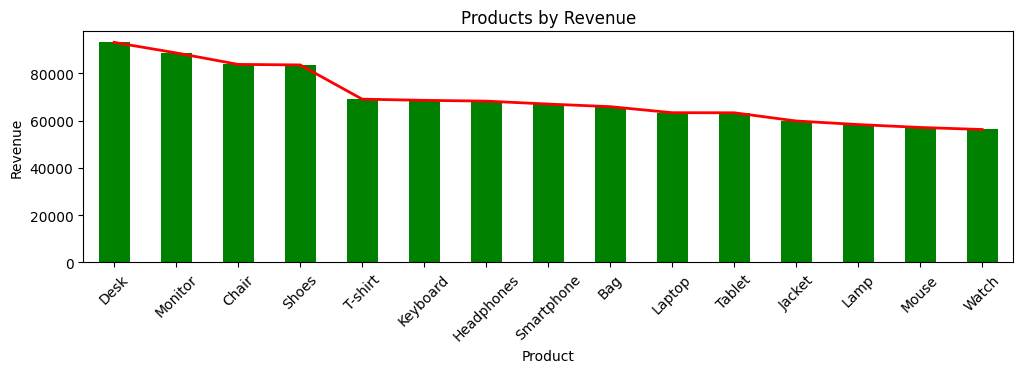

In [617]:
plt.figure(figsize=(12,3))
productRevenue.plot(kind='bar', color= 'green')
plt.plot(productRevenue.index, productRevenue.values, color='red', linewidth=2)
plt.title('Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [544]:
df.groupby('OrderDate')['TotalAmount'].agg('sum').sort_values(ascending = False).head(10)

OrderDate
2024-08-22    10787.65
2025-09-15     8584.65
2024-01-29     8027.95
2024-12-20     7703.03
2024-05-17     7652.24
2025-09-12     7494.15
2025-07-13     7029.62
2024-06-24     6621.31
2024-10-05     6460.60
2024-10-10     6271.97
Name: TotalAmount, dtype: float64

In [545]:
df['DayName'] = df['OrderDate'].dt.day_name()

In [546]:
df.columns

Index(['OrderID', 'CustomerName', 'Product', 'Category', 'Quantity',
       'PricePerUnit', 'OrderDate', 'Region', 'SalesRep', 'Discount',
       'TotalAmount', 'DayName'],
      dtype='object')

In [547]:
df.groupby('DayName')['TotalAmount'].agg('sum').sort_values(ascending = False)

DayName
Friday       169761.31
Monday       163954.22
Thursday     160413.49
Wednesday    158005.23
Saturday     148486.60
Tuesday      125710.24
Sunday       119187.64
Name: TotalAmount, dtype: float64

In [548]:
df['MonthName'] = df['OrderDate'].dt.month_name()

In [549]:
df.columns

Index(['OrderID', 'CustomerName', 'Product', 'Category', 'Quantity',
       'PricePerUnit', 'OrderDate', 'Region', 'SalesRep', 'Discount',
       'TotalAmount', 'DayName', 'MonthName'],
      dtype='object')

In [601]:
monthlyRevenue = df.groupby('MonthName')['TotalAmount'].agg('sum').sort_values(ascending = False)
print(monthlyRevenue)

MonthName
June         97112.19
October      96296.38
March        94515.18
April        93356.57
July         91220.33
January      89162.86
February     87003.28
December     80072.23
May          79815.73
November     79349.59
August       79117.64
September    78496.75
Name: TotalAmount, dtype: float64


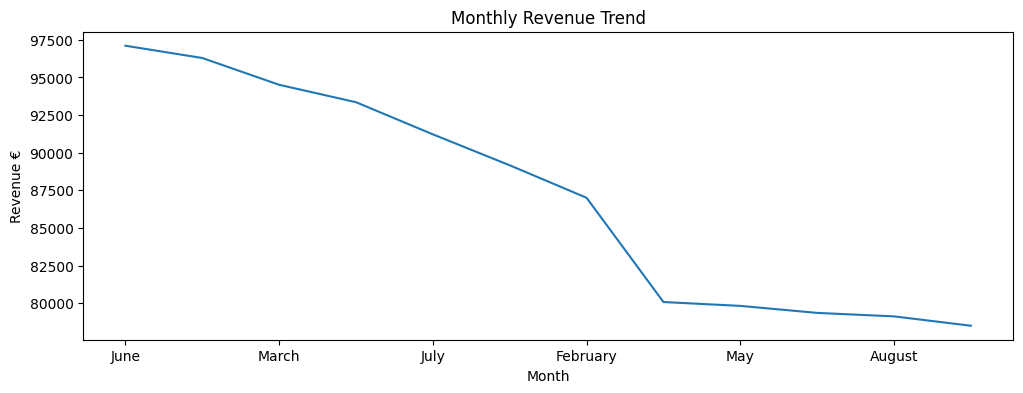

In [602]:
plt.figure(figsize=(12,4))
monthlyRevenue.plot()
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue €')
plt.show()

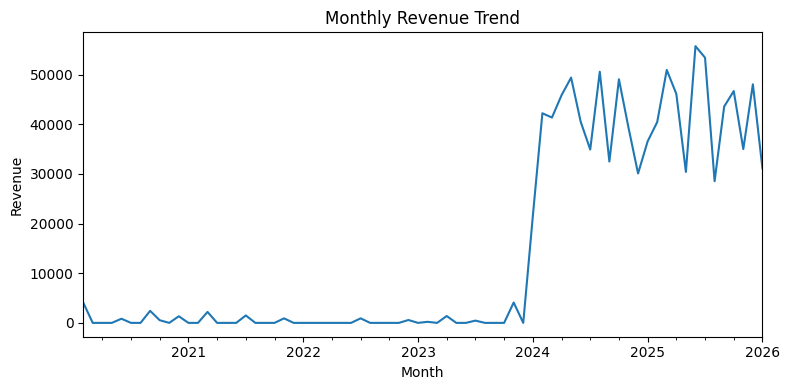

In [636]:
monthlyRev = df.set_index('OrderDate').resample('ME')['TotalAmount'].sum()

plt.figure(figsize=(8,4))
monthlyRev.plot()
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [565]:
revenueCategory = df.groupby('Category')['TotalAmount'].agg('sum').sort_values(ascending = False)
print(revenueCategory)

Category
Electronics    501893.20
Clothing       278235.51
Furniture      265390.02
Name: TotalAmount, dtype: float64


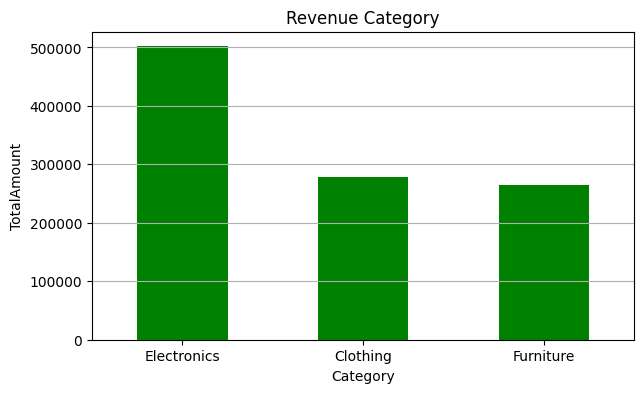

In [576]:
plt.figure(figsize=(7,4))
revenueCategory.plot(kind='bar', color='green')
plt.xlabel('Category')
plt.ylabel('TotalAmount')
plt.title('Revenue Category')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [577]:
saleRepPerformance = df.groupby('SalesRep')['TotalAmount'].agg('sum').sort_values(ascending = False)
print(saleRepPerformance)

SalesRep
Alice      366407.02
Bob        182377.60
Charlie    175052.26
David      166403.97
Eva        155277.88
Name: TotalAmount, dtype: float64


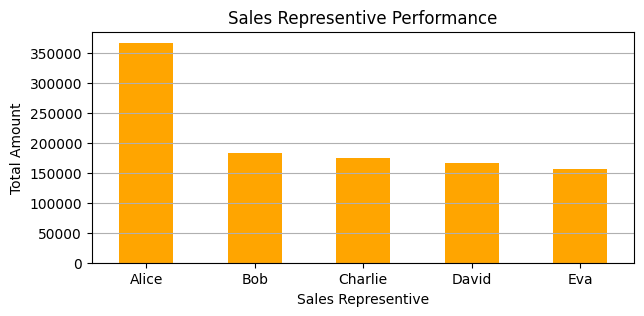

In [578]:
plt.figure(figsize= (7,3))
saleRepPerformance.plot(kind='bar', color= 'orange')
plt.ylabel('Total Amount')
plt.xlabel('Sales Representive')
plt.xticks(rotation=0)
plt.title('Sales Representive Performance')
plt.grid(axis='y')
plt.show()

In [556]:
df.groupby(['Discount','Product'])['Quantity'].agg('sum').sort_values(ascending = False).head(20)

Discount  Product   
5.00      Chair         45.0
10.00     Monitor       45.0
15.00     Laptop        43.0
5.00      Headphones    42.0
12.00     Desk          39.0
11.76     Headphones    38.0
15.00     Smartphone    37.0
5.00      Lamp          35.0
9.76      Mouse         35.0
5.00      Shoes         35.0
10.00     Chair         35.0
9.76      T-shirt       35.0
10.00     Laptop        34.0
          Keyboard      34.0
20.00     Jacket        34.0
          Smartphone    34.0
          Chair         34.0
15.00     Monitor       34.0
20.00     Desk          33.0
11.75     Shoes         33.0
Name: Quantity, dtype: float64

In [599]:
discountImpact = df.groupby('Discount')['TotalAmount'].agg('sum')
print(discountImpact)

Discount
5.00     197061.56
9.76     187913.51
10.00    184946.00
11.75     46838.78
11.76     78038.19
12.00     44126.15
15.00    148065.01
20.00    158529.53
Name: TotalAmount, dtype: float64


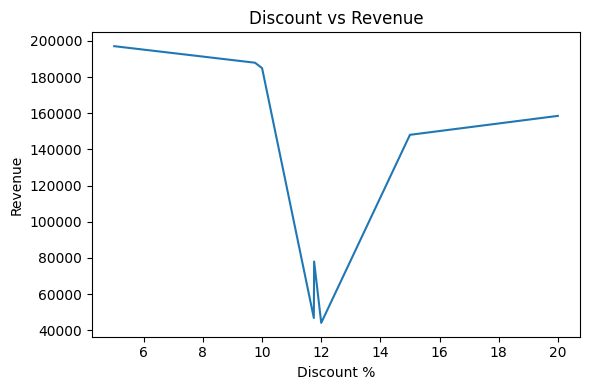

In [600]:
plt.figure(figsize=(6,4))
discountImpact.plot()
plt.title('Discount vs Revenue')
plt.xlabel('Discount %')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


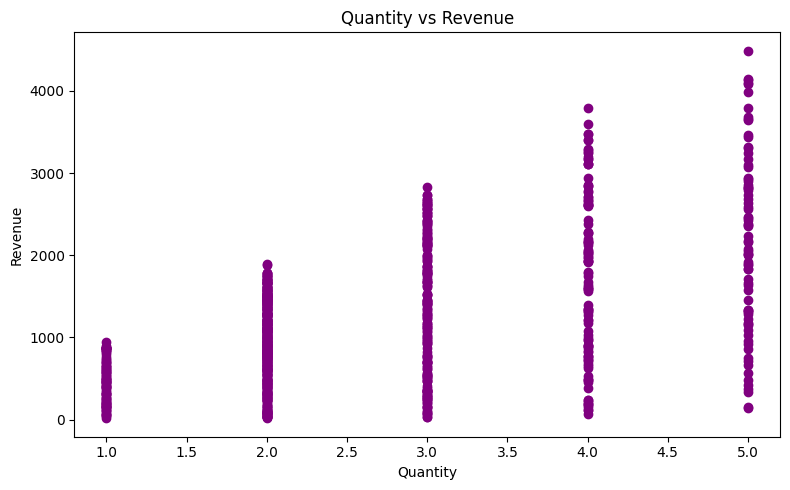

In [591]:
plt.figure(figsize=(8,5))
plt.scatter(df['Quantity'], df['TotalAmount'], color='Purple')
plt.title('Quantity vs Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [559]:
df.groupby('Region')[['TotalAmount','Quantity']].agg('sum').sort_values(by='TotalAmount',ascending = False)

,TotalAmount,Quantity
Region,,
West,285087.08,619.0
North,266797.23,587.0
South,258075.02,582.0
East,235559.40,504.0


In [620]:
regionRevenue = df.groupby('Region')['TotalAmount'].agg('sum').sort_values(ascending = False)
print(regionRevenue)

Region
West     285087.08
North    266797.23
South    258075.02
East     235559.40
Name: TotalAmount, dtype: float64


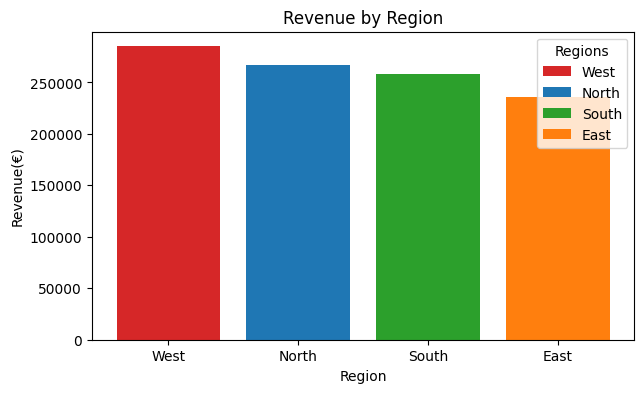

In [630]:
plt.figure(figsize=(7,4))
region= regionRevenue.index
revReg = regionRevenue.values
barLabels = ['West', 'North', 'South', 'East']
barColors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
plt.bar(region, revReg,  label=barLabels, color=barColors)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue(€)')
plt.xticks(rotation=0)
plt.legend(title='Regions')
plt.show()

In [561]:
df.groupby('OrderID')['Product'].count().sort_values(ascending=False)

OrderID
ORD1134    2
ORD1275    2
ORD1382    2
ORD1237    2
ORD1020    2
          ..
ORD1842    1
ORD1843    1
ORD1010    1
ORD1845    1
ORD1002    1
Name: Product, Length: 847, dtype: int64

In [562]:
df.groupby('CustomerName')['TotalAmount'].sum().sort_values(ascending=False).head(10)

CustomerName
Samantha Ford          6218.58
Clifford Clark         5423.68
Krystal Adkins         5222.44
Chad Wilson            4489.27
Elizabeth Gomez        4140.63
Jamie Summers          4128.82
Mr. Garrett Fischer    4091.40
Kevin Roberson         4078.30
Sandra Chen            4028.72
Jessica Bradley        3985.06
Name: TotalAmount, dtype: float64

In [563]:
df[df['TotalAmount'] > df['TotalAmount'].quantile(0.99)]

,OrderID,CustomerName,Product,Category,Quantity,PricePerUnit,OrderDate,Region,SalesRep,Discount,TotalAmount,DayName,MonthName
181,ORD1714,Mr. Garrett Fischer,Smartphone,Electronics,5.0,909.20,2024-05-17,North,Charlie,10.00,4091.40,Friday,May
230,ORD1623,Jessica Bradley,Desk,Furniture,5.0,937.66,2024-06-29,West,Alice,15.00,3985.06,Saturday,June
246,ORD1470,Elizabeth Andrade,Shoes,Clothing,4.0,997.66,2024-08-26,North,Alice,5.00,3791.11,Monday,August
632,ORD1471,Kenneth Knapp,Bag,Clothing,5.0,818.18,2025-11-22,South,David,10.00,3681.81,Saturday,November
650,ORD1694,Elizabeth Gomez,T-shirt,Clothing,5.0,917.72,2024-02-22,South,Alice,9.76,4140.63,Thursday,February
661,ORD1595,Chad Wilson,Jacket,Clothing,5.0,994.99,2025-02-15,West,David,9.76,4489.27,Saturday,February
683,ORD1425,Timothy Burke,Lamp,Electronics,5.0,840.74,2026-01-08,South,Charlie,9.76,3793.31,Thursday,January
778,ORD1417,Jamie Summers,T-shirt,Clothing,5.0,935.70,2024-10-10,North,David,11.75,4128.82,Thursday,October
854,ORD1202,Kevin Roberson,Smartphone,Electronics,5.0,858.59,2025-09-12,West,Eva,5.00,4078.30,Friday,September
